# 数据分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing, metrics, svm
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from xgboost import plot_importance

## 读取数据

In [2]:
# 读取训练集
data_train = pd.read_csv('flight_dataset.csv')

## 数据统计

In [3]:
print(data_train['出发延迟'].describe())
print(data_train['到达延迟'].describe())

count    15176.000000
mean        36.501186
std         72.956060
min        -43.000000
25%          6.000000
50%         16.000000
75%         39.000000
max       2080.000000
Name: 出发延迟, dtype: float64
count    15180.000000
mean        15.501252
std         75.924738
min       -774.000000
25%        -16.000000
50%         -3.000000
75%         21.000000
max       2156.000000
Name: 到达延迟, dtype: float64


## 直方图体现

c:\Python3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


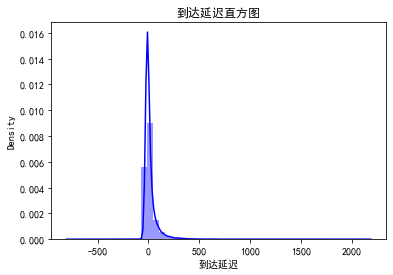

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# sns.distplot(data_train['出发延迟'], color="r")
sns.distplot(data_train['到达延迟'], color="b")
plt.title("到达延迟直方图")
plt.show()

## 偏度峰度

In [8]:
print("出发延迟偏度: %f" % data_train['出发延迟'].skew())
print("出发延迟峰度: %f" % data_train['出发延迟'].kurt())
print("到达延迟偏度: %f" % data_train['到达延迟'].skew())
print("到达延迟峰度: %f" % data_train['到达延迟'].kurt())

出发延迟偏度: 9.823551
出发延迟峰度: 182.617901
到达延迟偏度: 9.742342
到达延迟峰度: 185.500679


## 延迟散点图

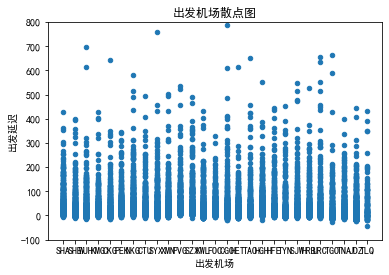

In [13]:
var = '出发机场'
data = pd.concat([data_train['出发延迟'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="出发延迟", ylim=(-100, 800))
plt.title("出发机场散点图")
plt.show()

## 相关性分析

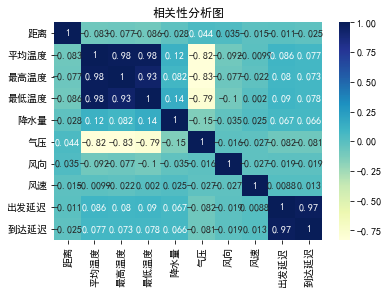

In [14]:
df_tmp1 = data_train[
    ['出发机场', '到达机场', '距离', '平均温度', '最高温度', '最低温度', '降水量', '气压', '风向', '风速','出发延迟', '到达延迟']]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.heatmap(df_tmp1.corr(), cmap="YlGnBu", annot=True)
plt.title("相关性分析图")
plt.show()